    LaTeX генератор таблиц (наконец-то полноценный, ориентация вертикальная):

In [16]:
print ("Введите данные:")
no_parse_data = input().split(' ')
data = [i_stolb.split() for i_stolb in no_parse_data]
# print (data)

output = "\hline\n"
for i_str in range (len (data[0])):
    for i_stolb in range (len (data)):
        output += data[i_stolb][i_str] + " & "
    output = output[0:-2] + "\\\\ \hline\n"

print (output)

Введите данные:
\hline
10 & 6334 & 2686 \\ \hline
11 & 6305 & 2674 \\ \hline
12 & 6267 & 2660 \\ \hline
13 & 6217 & 2640 \\ \hline
14 & 6164 & 2618 \\ \hline
15 & 6143 & 2608 \\ \hline
16 & 6096 & 2590 \\ \hline
17 & 6074 & 2578 \\ \hline



    А вот горизонтальная:

In [21]:
print ("Введите данные:")
data = input()
data = data.replace (' ',  "\\\\ \hline\n")
data = data.replace ('\t', " & ")
print ("\hline", data, "\\\\ \hline\n", sep = '\n')

Введите данные:
\hline
2630 & 2532 & 1960
\\ \hline



    Теперь основная часть:

Библиотечки

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sp_opt
from math import sqrt
from math import log as ln
from math import exp

МНК :heart: :heart: :heart:    

In [3]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)
    
    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x
    
    sigma_k = 1 / sqrt (len  (x)) * sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * sqrt (mid_x_pow2 - mid_x ** 2)
    
    return MNK_info (k, b, sigma_k, sigma_b)

Данные:

In [4]:
neon_lambda = list (map (float, input("Neon lamda: ").split()))
neon_phi    = list (map (float, input("Neon phi: ").split()))

In [5]:
hydr_lambda = list (map (float, input("Hydr lamda: ").split()))
hydr_phi    = list (map (float, input("Hydr phi: ").split()))

Калибровка: 

Идеал:

$\lambda(\varphi) = \exp (\sum a_n \varphi^n)$ (мб $+ C$ ещё)

Для этого решаем $A \cdot a = \ln (\lambda)$, где A - матрица Вандермонда, составленная из $\varphi_k$

Но не работает из-за огромность экспоненты.

Поэтому ограничимся n = 1:

$\lambda(\varphi) = a \cdot \exp (b \cdot \varphi) + c$

In [6]:
calib_lambda = neon_lambda + hydr_lambda
calib_phi    = neon_phi    + hydr_phi

func = lambda x, a, b, c: a * np.exp (b * x / 1000) + c
calib_coefs, corr_matrix = sp_opt.curve_fit (func, calib_phi, calib_lambda)

sigma_calib_coefs = [sqrt (corr_matrix[i][i]) for i in range (len (corr_matrix))]
print ("a = ", calib_coefs[0], "\n",
       "b = ", calib_coefs[1], "\n",
       "c = ", calib_coefs[2], "\n\n",
       "sigma_a = ", sigma_calib_coefs[0], "\n",
       "sigma_b = ", sigma_calib_coefs[1], "\n",
       "sigma_c = ", sigma_calib_coefs[2], "\n\n", sep = '')

sigma_lambda = lambda x: exp (calib_coefs[1] * x / 1000) * sigma_calib_coefs[0] + \
        calib_coefs[0] * exp (calib_coefs[1] * x / 1000) * sigma_calib_coefs[1] * x / 1000 + sigma_calib_coefs[2]


a = 186.29358461660524
b = 0.9803929388591602
c = 3751.356867615012

sigma_a = 10.462323515599977
sigma_b = 0.01698358910943385
sigma_c = 29.011487506453015

delta_a = 0.05616040690360638
delta_b = 0.017323247073971076
delta_c = 0.007733598409926154



In [33]:
my_phi = list (map (float, input("Phi: ").split()))

In [34]:
# For hydrogen finding Ridberg constant
n = 2
m = 3
Ze = 1

for phi in my_phi:
    value = func (phi, *calib_coefs)
    sigma = sigma_lambda (phi)
    
    R = 1 / (value * 1e-8 * Ze * (1/n/n - 1/m/m))
    sigma_R = R * sigma / value

    print (value, sigma, R, sigma_R)
    m += 1

6206.050576909922 276.511494629883 116015.81248448315 5169.1015587497195
5981.182706922429 250.127382834015 89168.54064933854 3728.943721771646
5024.054442377456 142.852047604208 94782.1090818307 2694.9983352842955


График

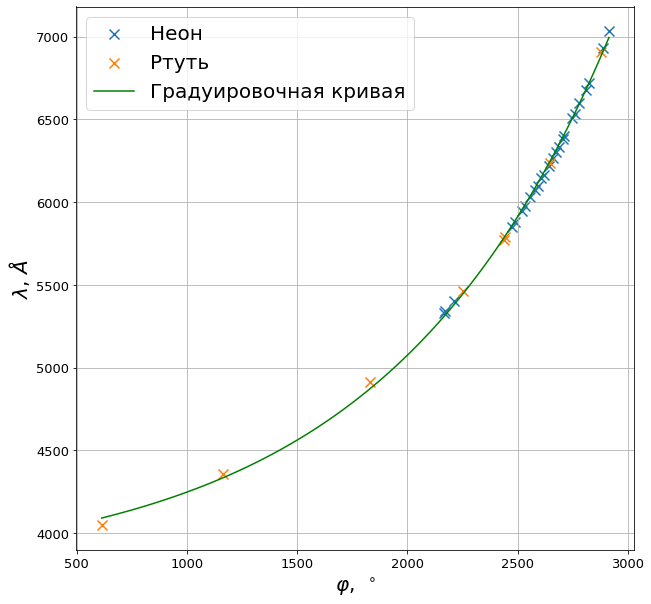

In [23]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

# linear = lambda x: MNK_info_curr.k * x + MNK_info_curr.b

ax.scatter (neon_phi, neon_lambda, marker = 'x', s=100, label = "Неон")
ax.scatter (hydr_phi, hydr_lambda, marker = 'x', s=100, label = "Ртуть")

calib_exp_x = np.linspace (min (calib_phi), max (calib_phi), 100)
calib_exp_y = func (calib_exp_x, *calib_coefs)
ax.plot (calib_exp_x, calib_exp_y, color = "green", label = "Градуировочная кривая")

ax.set_xlabel ('$\\varphi, ~^\circ$', fontsize = 20)
ax.set_ylabel ('$\\lambda$, $\\AA$',  fontsize = 20)

plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("Picturies/calib.pdf")